# Applications of SVD (Part I)

In class, we have been discussing the *Singular Value Decomposition*. This will be the basis for all our remaining labs, as it is one of the most widely applied concepts in data science, at least as far as linear algebra is concerned. First, a quick reminder of where we are.

> ## Make a copy of this notebook (File menu -> Make a Copy...)

## Preliminaries and Definitions

**Question 1** Given a matrix $A$, what can you say about the matrix $A^TA$? What does that imply about the eigenvalues of $A^TA$?   

$A^TA$ is symmetric and positive semi-definite, meaning there are only non-negative (positive or 0) eigenvalues.

**Question 2** Given a matrix $a$, define the following concepts:
1. The *left singular vectors* of $A$; unit eigenvectors of $AA^T$
1. The *right singular vectors* $A$; unit eigenvectors of $A^TA$
1. The *singular values* of $A$. $AA^T$ and $A^TA$ share their non-zero eigen values; the positive square root of these eigen values are the **singular values** of $A$.

**Question 3** If $A$ is a matrix, then the SVD of $A$ is a decomposition $A=U\Sigma V^T$. By referring to Question 2, define $U$, $\Sigma$, and $V$.  
$U$ = the cols are the left-singular vectors   
$V$ = the cols are the right-singular vectors  
$\Sigma$ = diagonal matrix with the singular values on the main diagonal  

**U and V are both orthogonal**


**Question 4** Using previous work on eigenvectors and eigenvalues, compute the SVD of  $$A=\begin{bmatrix}2&-4\\4&4\end{bmatrix}.$$ You can do this by hand, by using code you've developed, or by using eigenvalue and eigenvector functions built into NumPy. Pay attention to the order of the eigenvalues in $\Sigma$ (you should order them in decreasing order) and make sure the columns of $U$ and $V$ correspond! Make sure you test your answer!

**Note:** If you do this by hand, you can get nice exact values! It's a good algebra exercise!

$A=U\Sigma V^T$   
$Av = U\Sigma$  
(1/singular value)

In [32]:
import numpy as np
def SVD (A):
    rows, cols = np.shape(A)
    U = np.zeros((rows,cols))
    V = np.linalg.eig(A.T@A)[1]
    #print(V)
    s = np.linalg.eig(A.T@A)[0]
    Sig = np.zeros((rows,rows))
    i = 0
    order = np.flip(np.argsort(s,axis=0))
    V = V[:,order]
    if V[0,0]==0:
        V[:,0]= V[:,0]*(-1)
    #print(V)
    s = s[order]
    while i<len(s):
        if s[i]!=0:
            Sig[i,i] = np.sqrt(s[i])
        i+=1;
    for i in range (0,cols):
        U[:,i] = (A@V[:,i])/Sig[i,i]
    return (U,V,Sig)
A = np.array([[2,-4],[4,4]])
U,V,Sig = SVD(A)
#print(SVD(A))
#print (U@Sig@V.T)

#print (A@V[:,0]/6)
#print (A@V[:,1]/4)
print(V)
print(U)
print(Sig)

##if the first entry of the ordered V multiply the entire column by negative 1.

[[-0.4472 -0.8944]
 [-0.8944 0.4472]]
[[0.4472 -0.8944]
 [-0.8944 -0.4472]]
[[6.0000 0.0000]
 [0.0000 4.0000]]


In [33]:
def SVD (A):
    rows, cols = np.shape(A)
    #use the equation 1/sigma *A *vi = ui
    U = np.linalg.eig(A@A.T)[1]
    V = np.linalg.eig(A.T@A)[1]
    s = np.linalg.eig(A@A.T)[0]
    order = np.flip(np.argsort(s,axis=0))
    U = U[order]
    V = V[order]
    s = s[order]
    Sig = np.zeros((rows,rows))
    i = 0
    while i<len(s):
        if s[i]!=0:
            Sig[i,i] = np.sqrt(s[i])
        i+=1;
    return (U,V,Sig)

### Using Built-in NumPy Functions

The command `np.linalg.svd(A)` returns the matrices $U$, the diagonal of the matrix $\Sigma$, and the matrix $V^T$ (note that $V$ is outputted transposed!). In order to convert the diagonal of $\Sigma$ into the full matrix, use the `np.diag(D)` command that takes a diagonal and returns the corresponding matrix.

**Question 5** Using the same matrix $A$ as in the previous question, use these built in commands to compute the SVD of $A$. Test the results and comment on any differences from your answer in Question 4.

In [38]:

U, S, V = np.linalg.svd(A)
S = np.diag(S)
print(U@S@V.T)
#some differences

[[2.0000 -4.0000]
 [4.0000 4.0000]]


### A Quick Utility Function

We can rewrite the SVD as 

$$A=U\Sigma V^T = \sigma_1 u_1 v_1^T + \sigma_2 u_2v_2^T + \ldots + \sigma_r u_rv_r^T,$$

where $r$ is the rank of $A$, the $u_i$'s are the left singular vectors, the $v_i$'s the right singular vectors, and the $\sigma_i$'s the singular values. Note that we are taking *outer products* between the singular vectors. Since the SVD is written in decreasing order of singular values, the later $\sigma_i$'s are often very small compared to the earlier ones, and so those last terms contribute little to the matrix $A$. Therefore, for any $k<r$: 

$$A\approx \sigma_1 u_1 v_1^T + \sigma_2 u_2v_2^T + \ldots + \sigma_k u_kv_k^T.$$

In fact, this is the best rank $k$ approximation of $A$.

**Definition** if $A=U\Sigma V^T$ is the the SVD of $A$, then the *truncated SVD of rank $k$* of $A$ is $U_k\Sigma_kV^T_k$, where $U_k$ is the first $k$ columns of $u$, $\Sigma_k$ is the diagonal matrix consisting of the first $k$ entries in $\Sigma$, and $V^T_k$ is the $k$ rows of $v^T$. You can verify that this is the same as the sum of outer products above.

**Question 6** For convenience, write a function called `SVDRebuild(U,S,V,k)` that takes the SVD of an array $A$ and an integer $k$, and returns the matrix $U_k\Sigma_kV_k^T$ corresponding to the truncated SVD of rank $k$.

In [5]:
def SVDRebuild(U,S,V,k):
    rows,cols = np.shape(U)
    approx = np.zeros((rows,cols))
    for i in range (0,k):
        si = S[i,i]
        ui = U[:,i]
        viT = V[:,i]
        approx+=si*(np.outer(ui,viT))
    return approx;
U,V,Sig = SVD(A)
print(SVDRebuild(U,Sig,V,1))

[[-1.2  2.4]
 [-2.4  4.8]]


## Image Compression


<img src='puppy.bmp'>

This photo of an adorable puppy is an 8-bit grayscale image, in which each pixel can be represented by a number between 0 and 255. Zero indicates a black pixel, 255 a white pixel, and numbers in between can be thought of as a measure of brightness. In other words, we can think of this $600\times600$ pixel image as a matrix! We can load the image into a NumPy array *A* as follows:
```python
%matplotlib notebook
import matplotlib.pylab as plt

A=plt.imread('puppy.bmp')
```
After running this, you can use:

```python
plt.imshow(A,cmap='gray')
```
to display the image

In general, the rank of the matrix representing a natural image is its number of rows or columns (which one is it? Why?), or close to that. In this section, we will see that we can use SVD to find a lower rank matrix that gives a very similar image. We will see that this is essentially an *image compression* technique, as we need to store far less information.

**Question 7** Suppose we begin with an $m\times n$ image. Then it takes $mn$ numbers to represent it. Suppose we use a rank $k$ SVD truncation. How many numbers need to be stored? You may assume $m\geq n$. In terms of $m$ and $n$, what is the minimum value of $k$ that makes storing the compressed image take less space than the original? In our case, our image is $600\times 600$ pixels. What maximum value of $k$ could you choose for efficient storage?


<IPython.core.display.Javascript object>


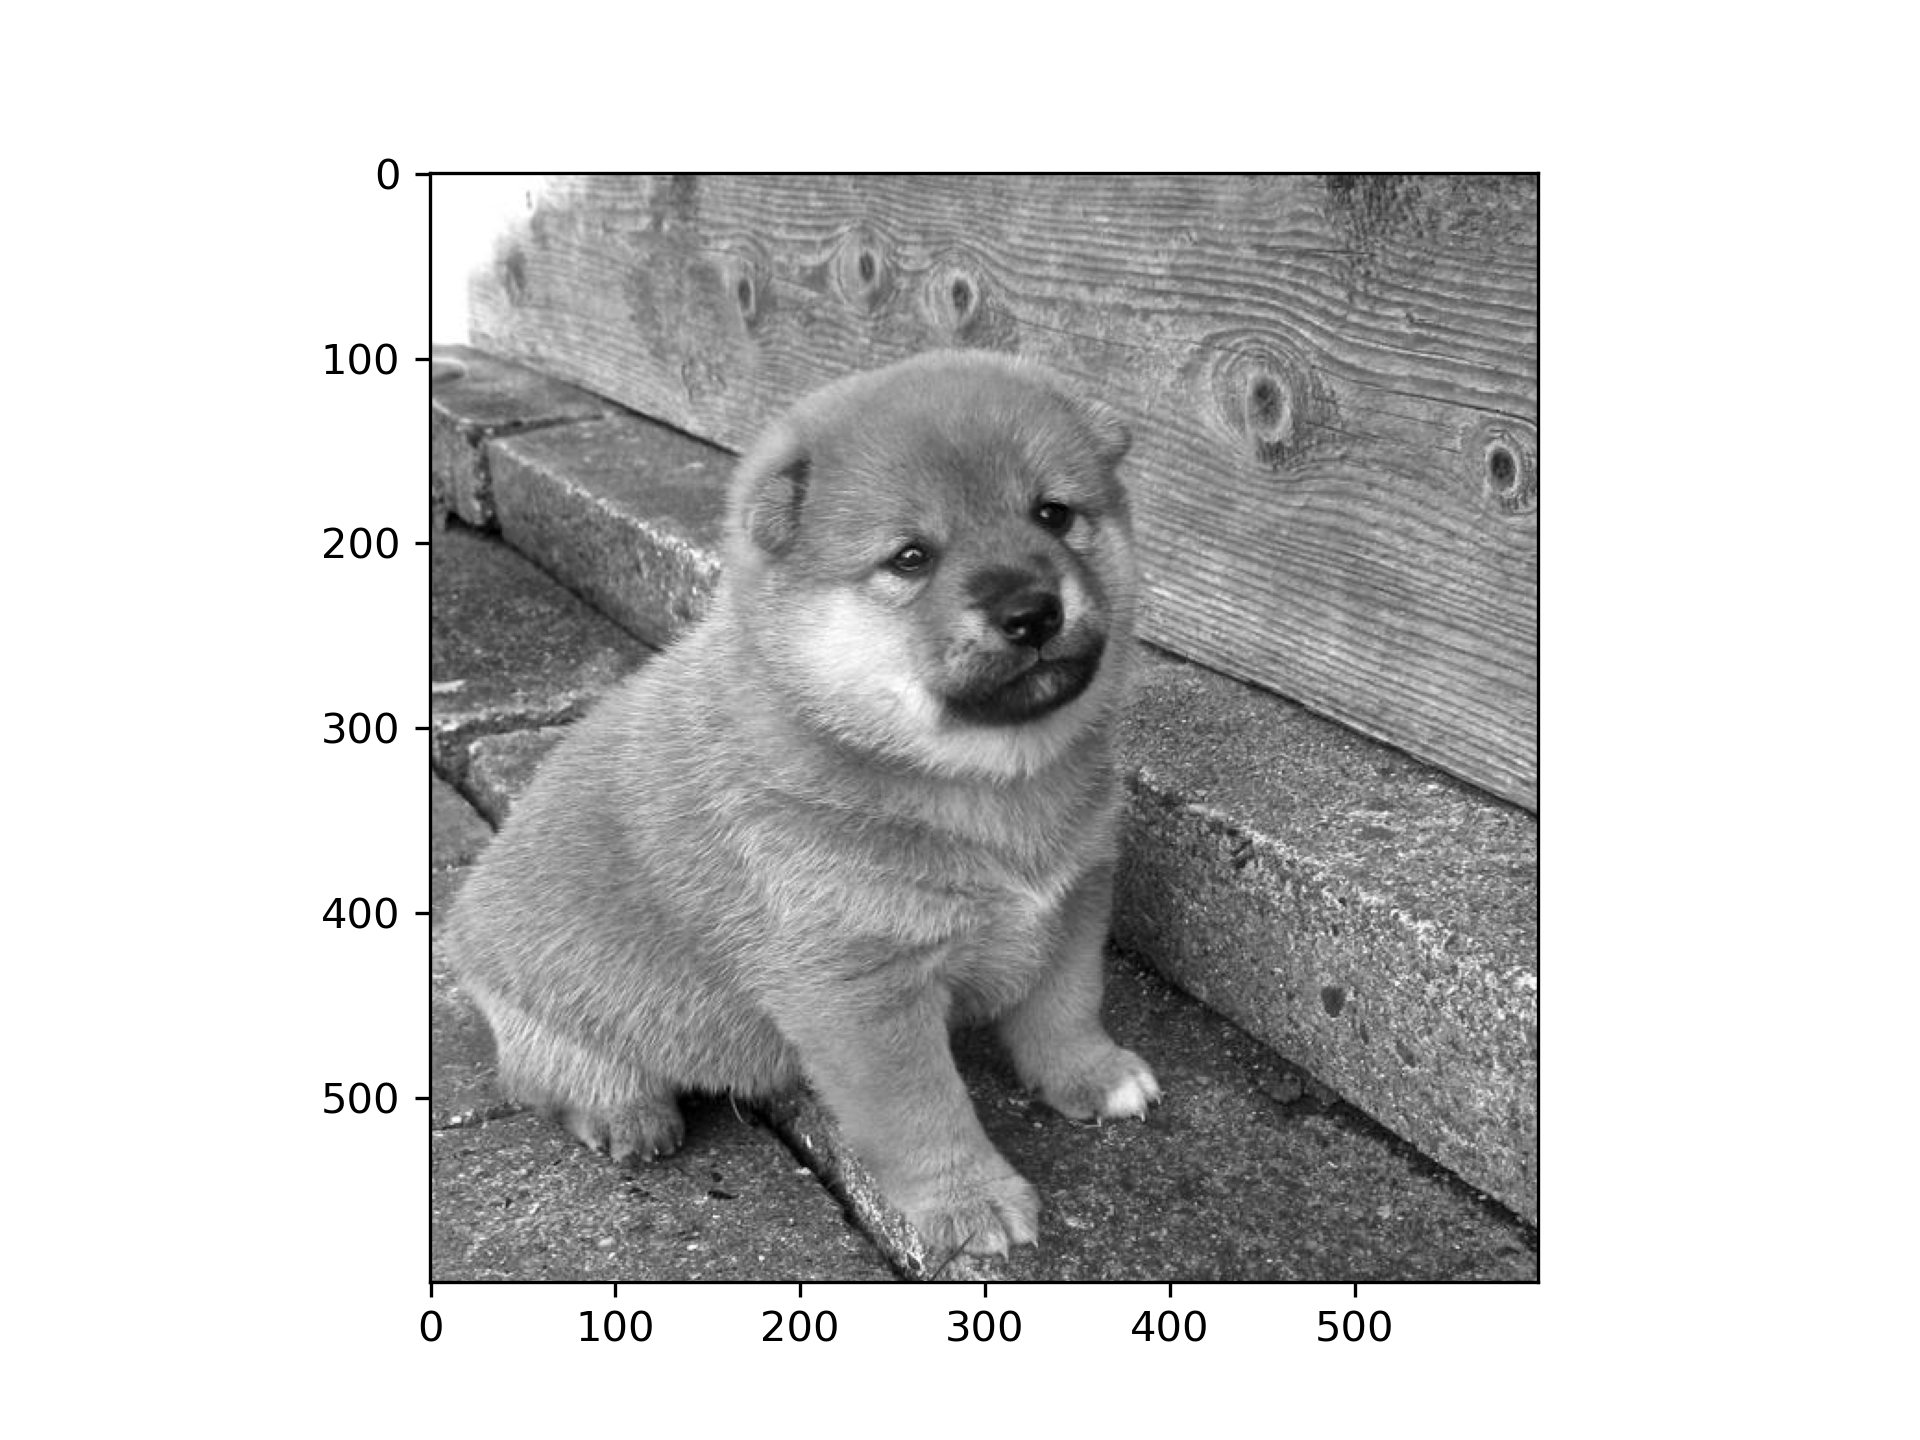

In [6]:
%matplotlib notebook
import matplotlib.pylab as plt

A=plt.imread('puppy.bmp')
plt.imshow(A,cmap='gray')

#the rank of the image is the smaller of either the number of rows or cols
#minimum value for k would be n, and maximum value for k would be m.

### Back to the Puppy!

**Question 8** For a variety of values of $k$, examine the image you get when you rebuild the matrix from the truncated SVD of rank $k$. Take the SVD of the image, and start with small *k*. Use the following code to get an interactive widget that allows you to examine the progression:
```python
from ipywidgets import interact
import ipywidgets as widgets

fig, ax = plt.subplots()

@interact(k=widgets.IntSlider(min=1,max=300,step=1,value=1,continuous_update=True))
def update(k):
    ax.imshow(SVDRebuild(U,S,V,k),cmap='gray')
```
1. What is the smallest value of $k$ that lets you recognize that the image is a puppy?
1. What is the smallest value of $k$ that makes it hard to distinguish the compressed image from the original?

<IPython.core.display.Javascript object>


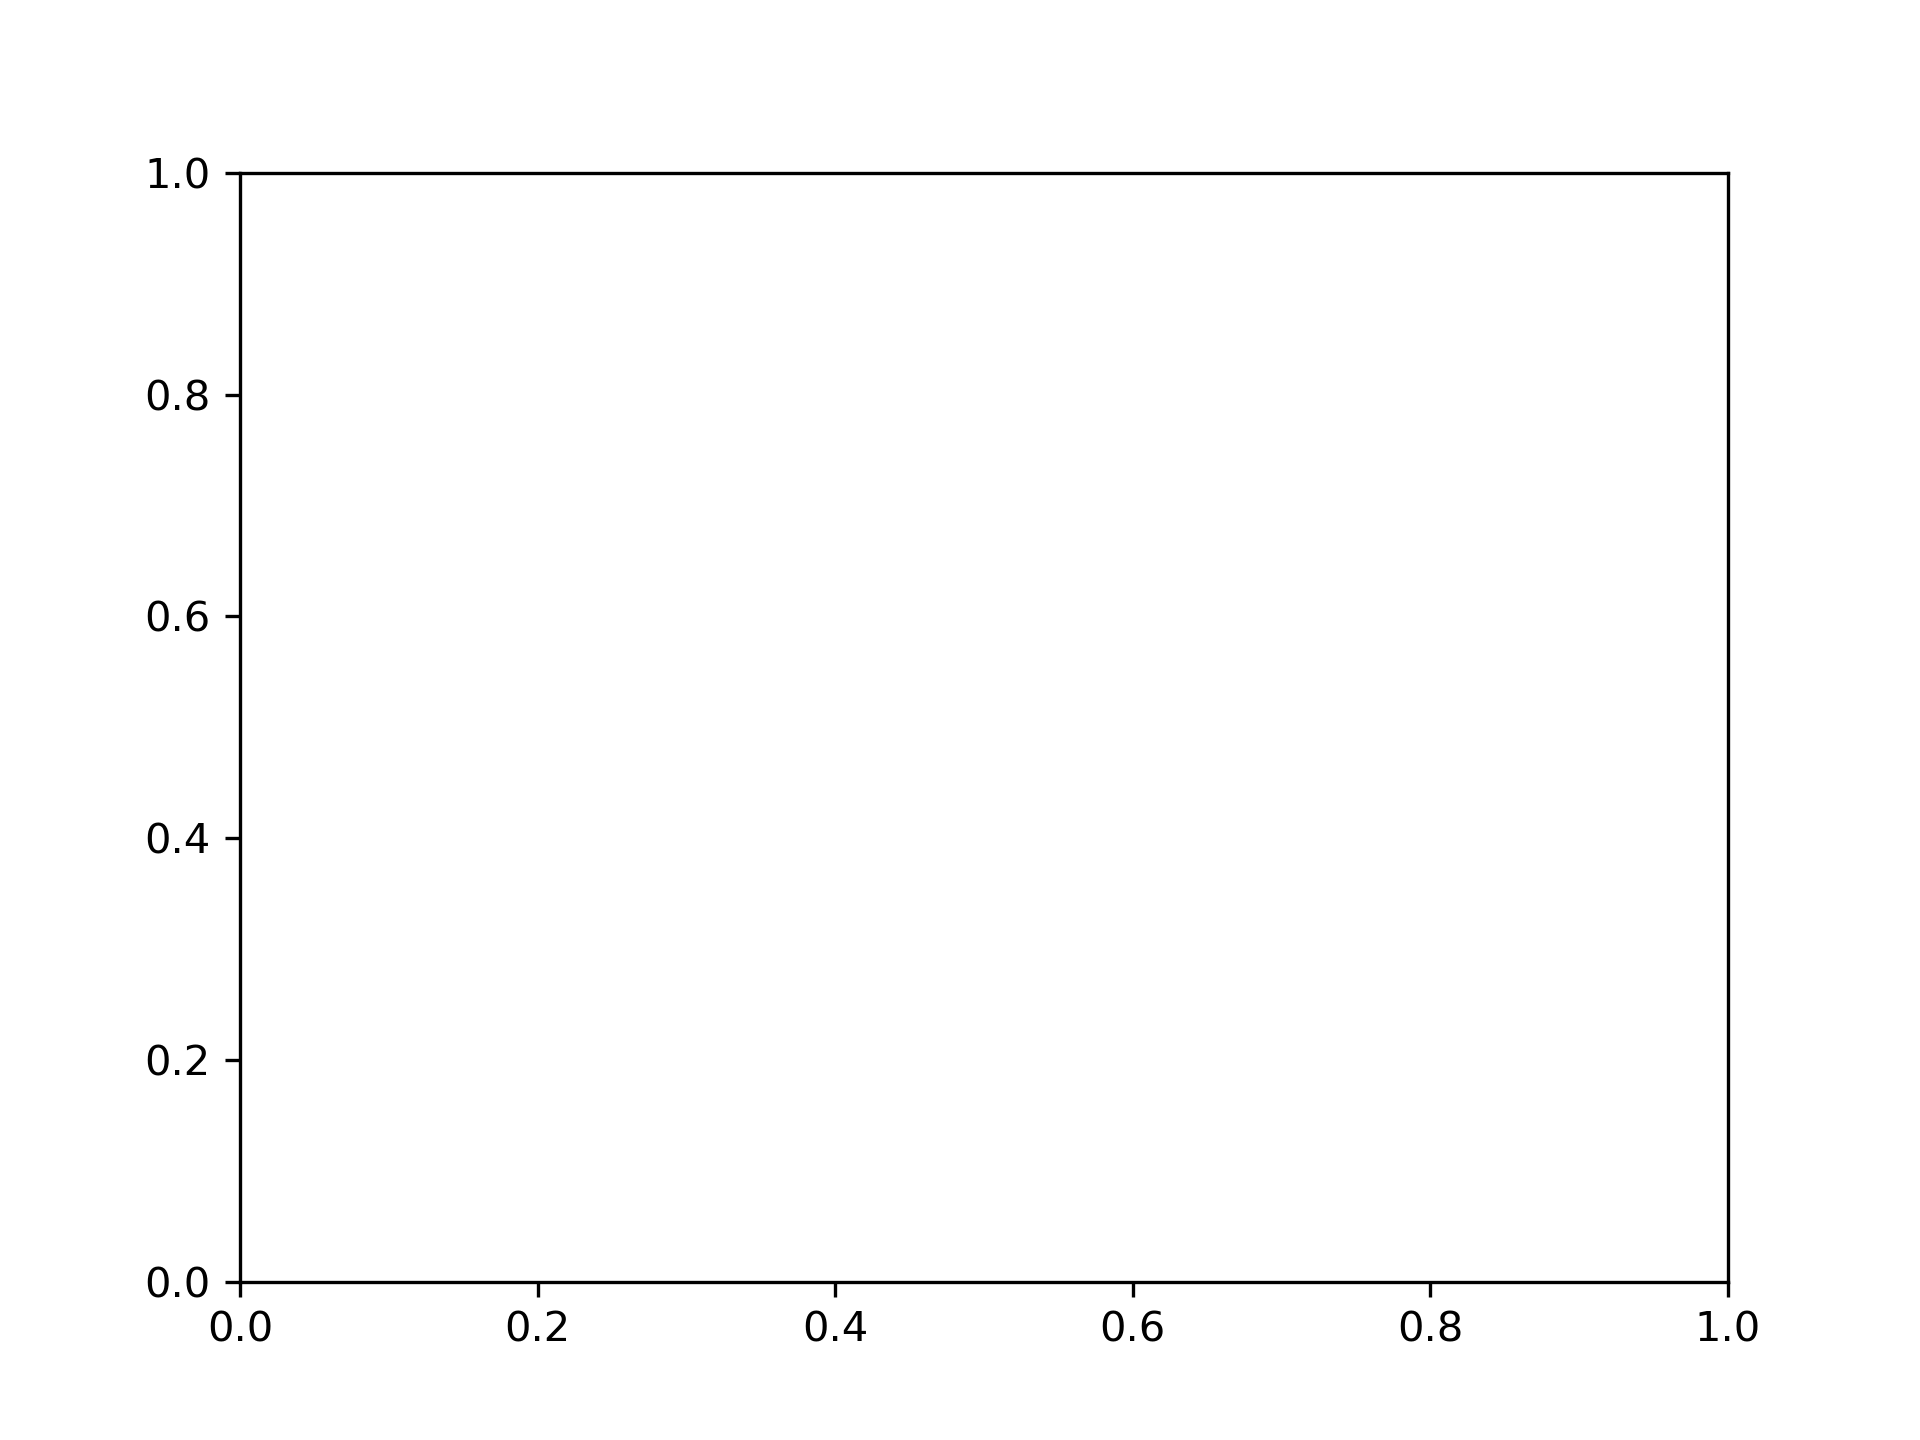

interactive(children=(IntSlider(value=1, description='k', max=300, min=1), Output()), _dom_classes=('widget-in…

In [39]:
from ipywidgets import interact
import ipywidgets as widgets

fig, ax = plt.subplots()
U,S,V = np.linalg.svd(A)
Sig= np.diag(S)
V = V.T
@interact(k=widgets.IntSlider(min=1,max=300,step=1,value=1,continuous_update=True))
def update(k):
    ax.imshow(SVDRebuild(U,Sig,V,k),cmap='gray')

1.  Smallest k letting us recognize the image as a puppy is k=6
2.  Smallest value of k making it hard to distinguish the compressed image from the original is 230.

### Proportion of Information

You probably noticed in the last question that you don't really need that many columns/rows of the SVD matrices to reconstruct the original image pretty darn well. To explain this, let's look at the singular values.

**Question 9** We'll look at each singular value as a pecentage of the sum of the singular values. That will give us an idea of how much of the total information in the image is contributed by each column/row of the decomposition. 
1. Compute the sum of the singular values and store it.<br><br>
1. Divide the array $\Sigma$ by your sum and multiply by 100 (to show percentages), then print it. For ease of reading, the following command will get floats to print to four decimal places:
```python
np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})
```

(To reset to default options, call `np.set_printoptions()` with no options.)

In [8]:
#proportion of information is contained in the truncated SVD of rank k is sum from 1 to k of 
#the singular vallues up to k divided by the sum of all of the singular values
sigsum = np.sum(S)
#print(S)
np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})
Ss = S/sigsum *100
print(Ss)

[24.3613 3.3498 2.2373 1.9858 1.6382 1.5245 1.1441 0.9383 0.8885 0.8634
 0.7977 0.7605 0.6957 0.6594 0.6516 0.6141 0.5908 0.5769 0.5653 0.5486
 0.5258 0.5094 0.4962 0.4895 0.4869 0.4659 0.4583 0.4451 0.4379 0.4312
 0.4273 0.4154 0.4076 0.4062 0.4010 0.3966 0.3902 0.3859 0.3807 0.3765
 0.3713 0.3620 0.3597 0.3535 0.3481 0.3437 0.3400 0.3354 0.3338 0.3298
 0.3271 0.3207 0.3180 0.3132 0.3120 0.3070 0.3059 0.3021 0.3007 0.2916
 0.2907 0.2889 0.2873 0.2831 0.2795 0.2777 0.2755 0.2752 0.2711 0.2697
 0.2659 0.2648 0.2629 0.2591 0.2583 0.2552 0.2530 0.2500 0.2480 0.2473
 0.2465 0.2437 0.2424 0.2384 0.2372 0.2366 0.2353 0.2332 0.2315 0.2299
 0.2271 0.2246 0.2213 0.2207 0.2205 0.2189 0.2162 0.2153 0.2131 0.2118
 0.2101 0.2088 0.2078 0.2061 0.2026 0.2013 0.2003 0.1990 0.1976 0.1957
 0.1945 0.1936 0.1922 0.1916 0.1896 0.1881 0.1875 0.1853 0.1846 0.1838
 0.1824 0.1796 0.1793 0.1789 0.1774 0.1772 0.1762 0.1759 0.1743 0.1727
 0.1717 0.1701 0.1687 0.1671 0.1662 0.1653 0.1634 0.1630 0.1624 0.1599
 0.15

**Question 10** We want to know how much of the information is contained in the first $k$ rows/columns.
1. Explain why we can get this by taking the *cumulative sums* of the singular values.<br><br>
1. Use the `np.cumsum(s)` command to compute the cumulative sum of your singular values. Divide the resulting array by the sum of the singular values and print your result.<br><br>
1. How many rows/columns do you need to have 50% of the original information? 60%? 70%? 80%? 90%? 95%? 
> **Note:** The command
```python
np.argmax(S>0.5)
```
will give the first index of $S$ that exceeds 0.5.
1. Plot your cumulative proportions vs. number of rows/columns. The following code gives a line plot with x-coordinates *xs* and y-coordinates *ys*:
```python
fig, ax = plt.subplots()
ax.plot(xs, ys)
```

29
57
97
153
240
313


<IPython.core.display.Javascript object>


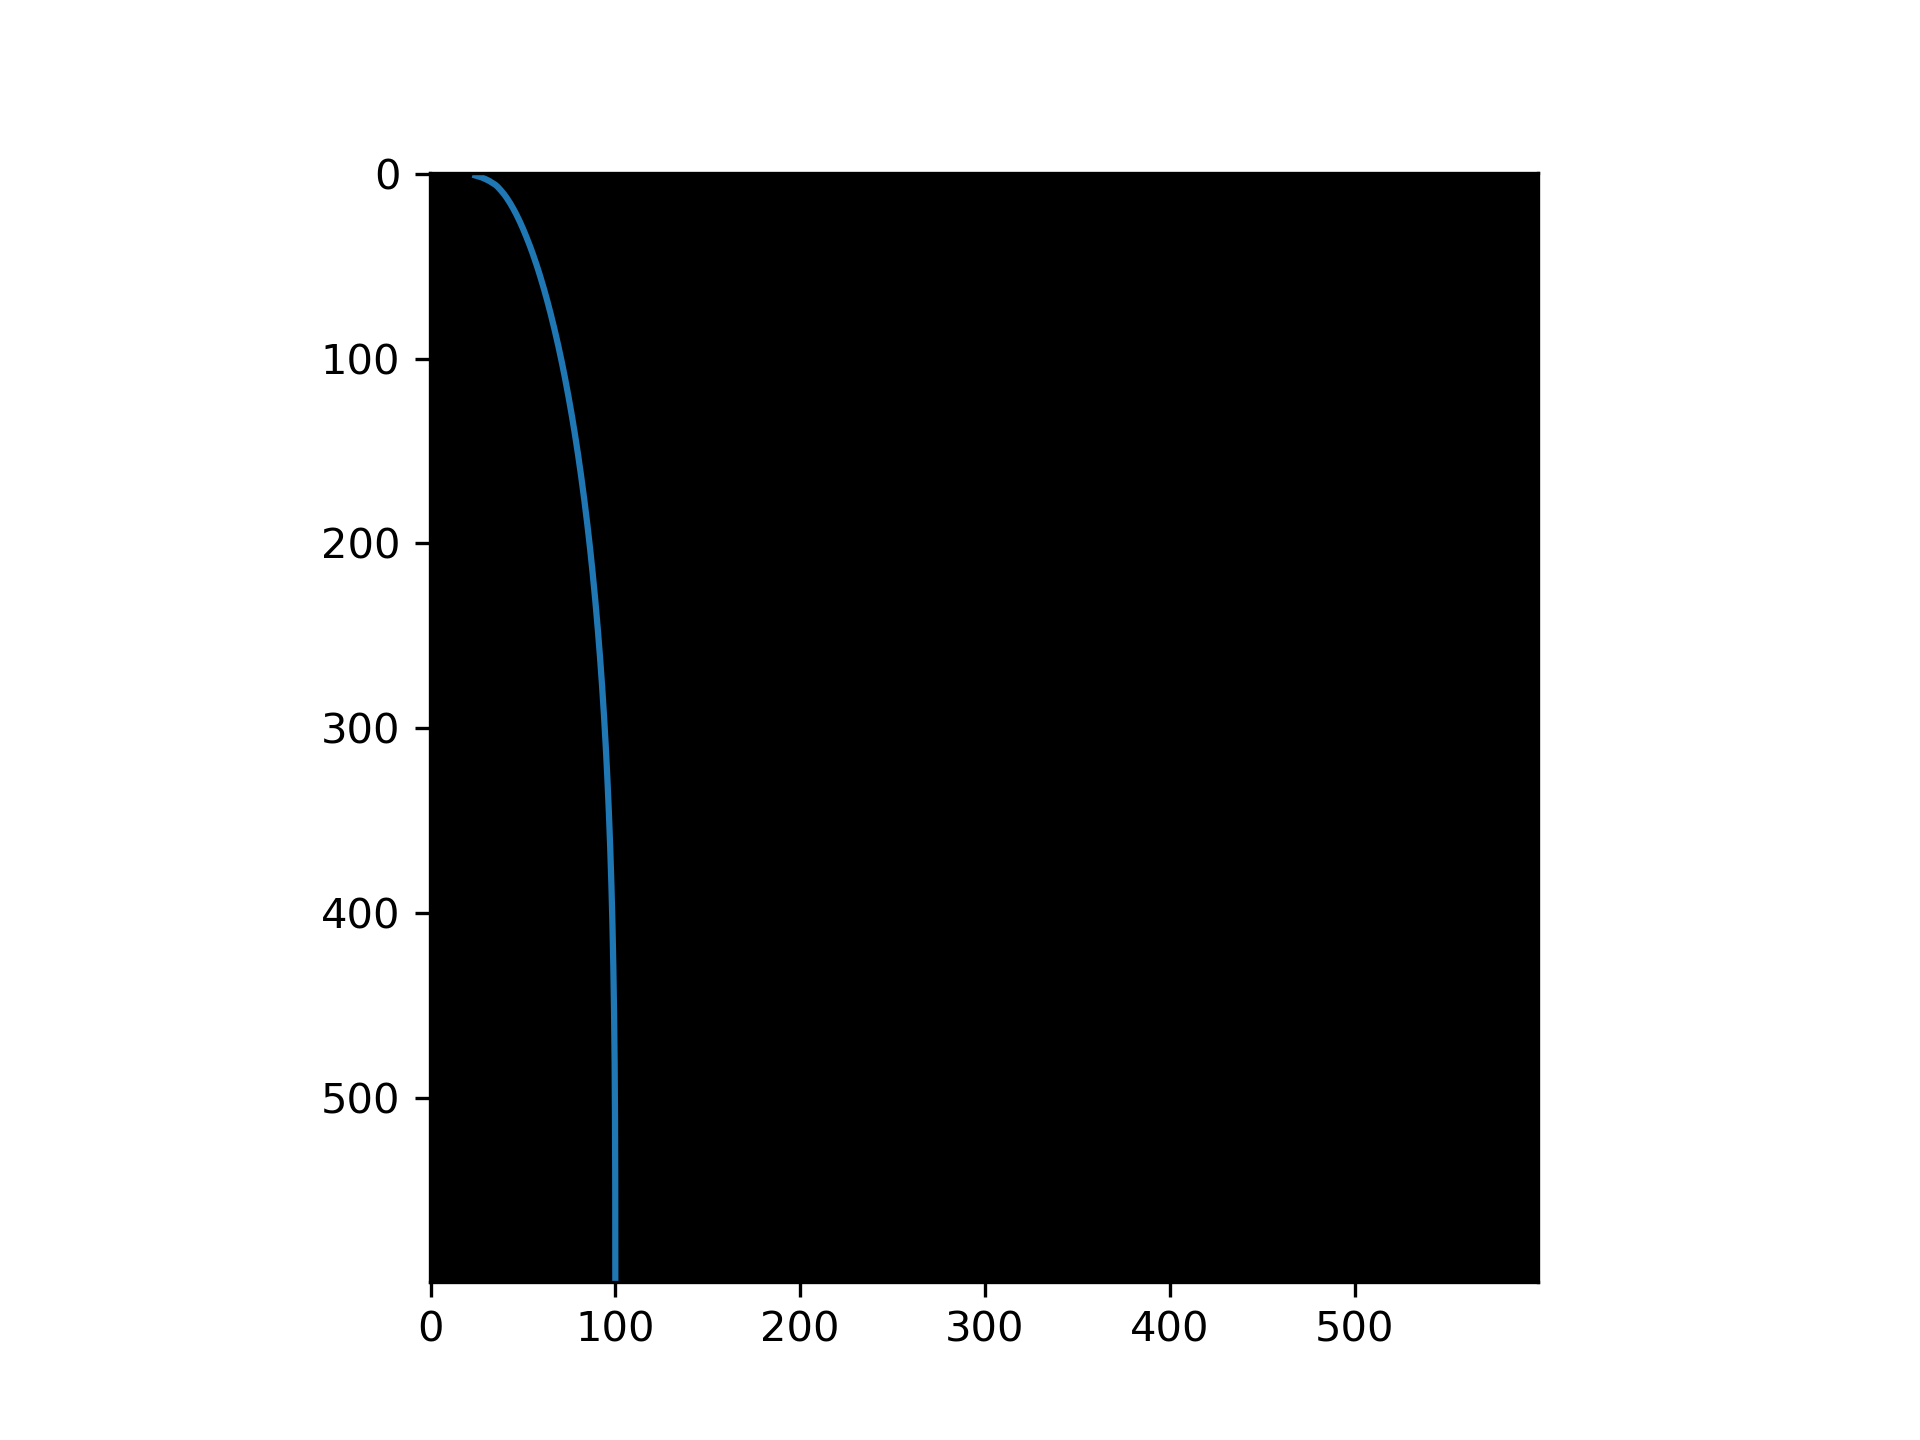

In [9]:
#1. By taking the cumulative sums of the singular values in descending order, we can see the "weight" that each singular
#  value has on every outer product as we take k number of outer products of U and V. By doing so, we can see that the first
#  several values have a much more significant effect than do the latter ones, demonstrating that some of the latter 
#  singular values may not even be necessary to find an A matrix close enough to our ideal.
#print(np.cumsum(S))
cumulative = np.cumsum(Ss)
#print(cumulative)
print(np.argmax(cumulative>50))
print(np.argmax(cumulative>60))
print(np.argmax(cumulative>70))
print(np.argmax(cumulative>80))
print(np.argmax(cumulative>90))
print(np.argmax(cumulative>95))

fig, ax = plt.subplots()
xs = cumulative;
ys = range(1,601)
ax.plot(xs, ys)

**Question 11** 
1. Write a function `SVDthresh(S,t)` that takes the singular values $S$ of an array $A$ and a threshold $t$ between 0 and 1, and returns the number $k$ of columns/rows of the SVD needed to have $t$ of the information from the original array. <br><br>
1. Use your function together with your `SVDRebuild(U,S,V,k)` function to display the image of the puppy with various proportions of the information in the original image. Use `FloatSlider` instead of `IntSlider`.<br><br>
1. Answer the same questions as in Question 8, but with proportions of information.

<IPython.core.display.Javascript object>


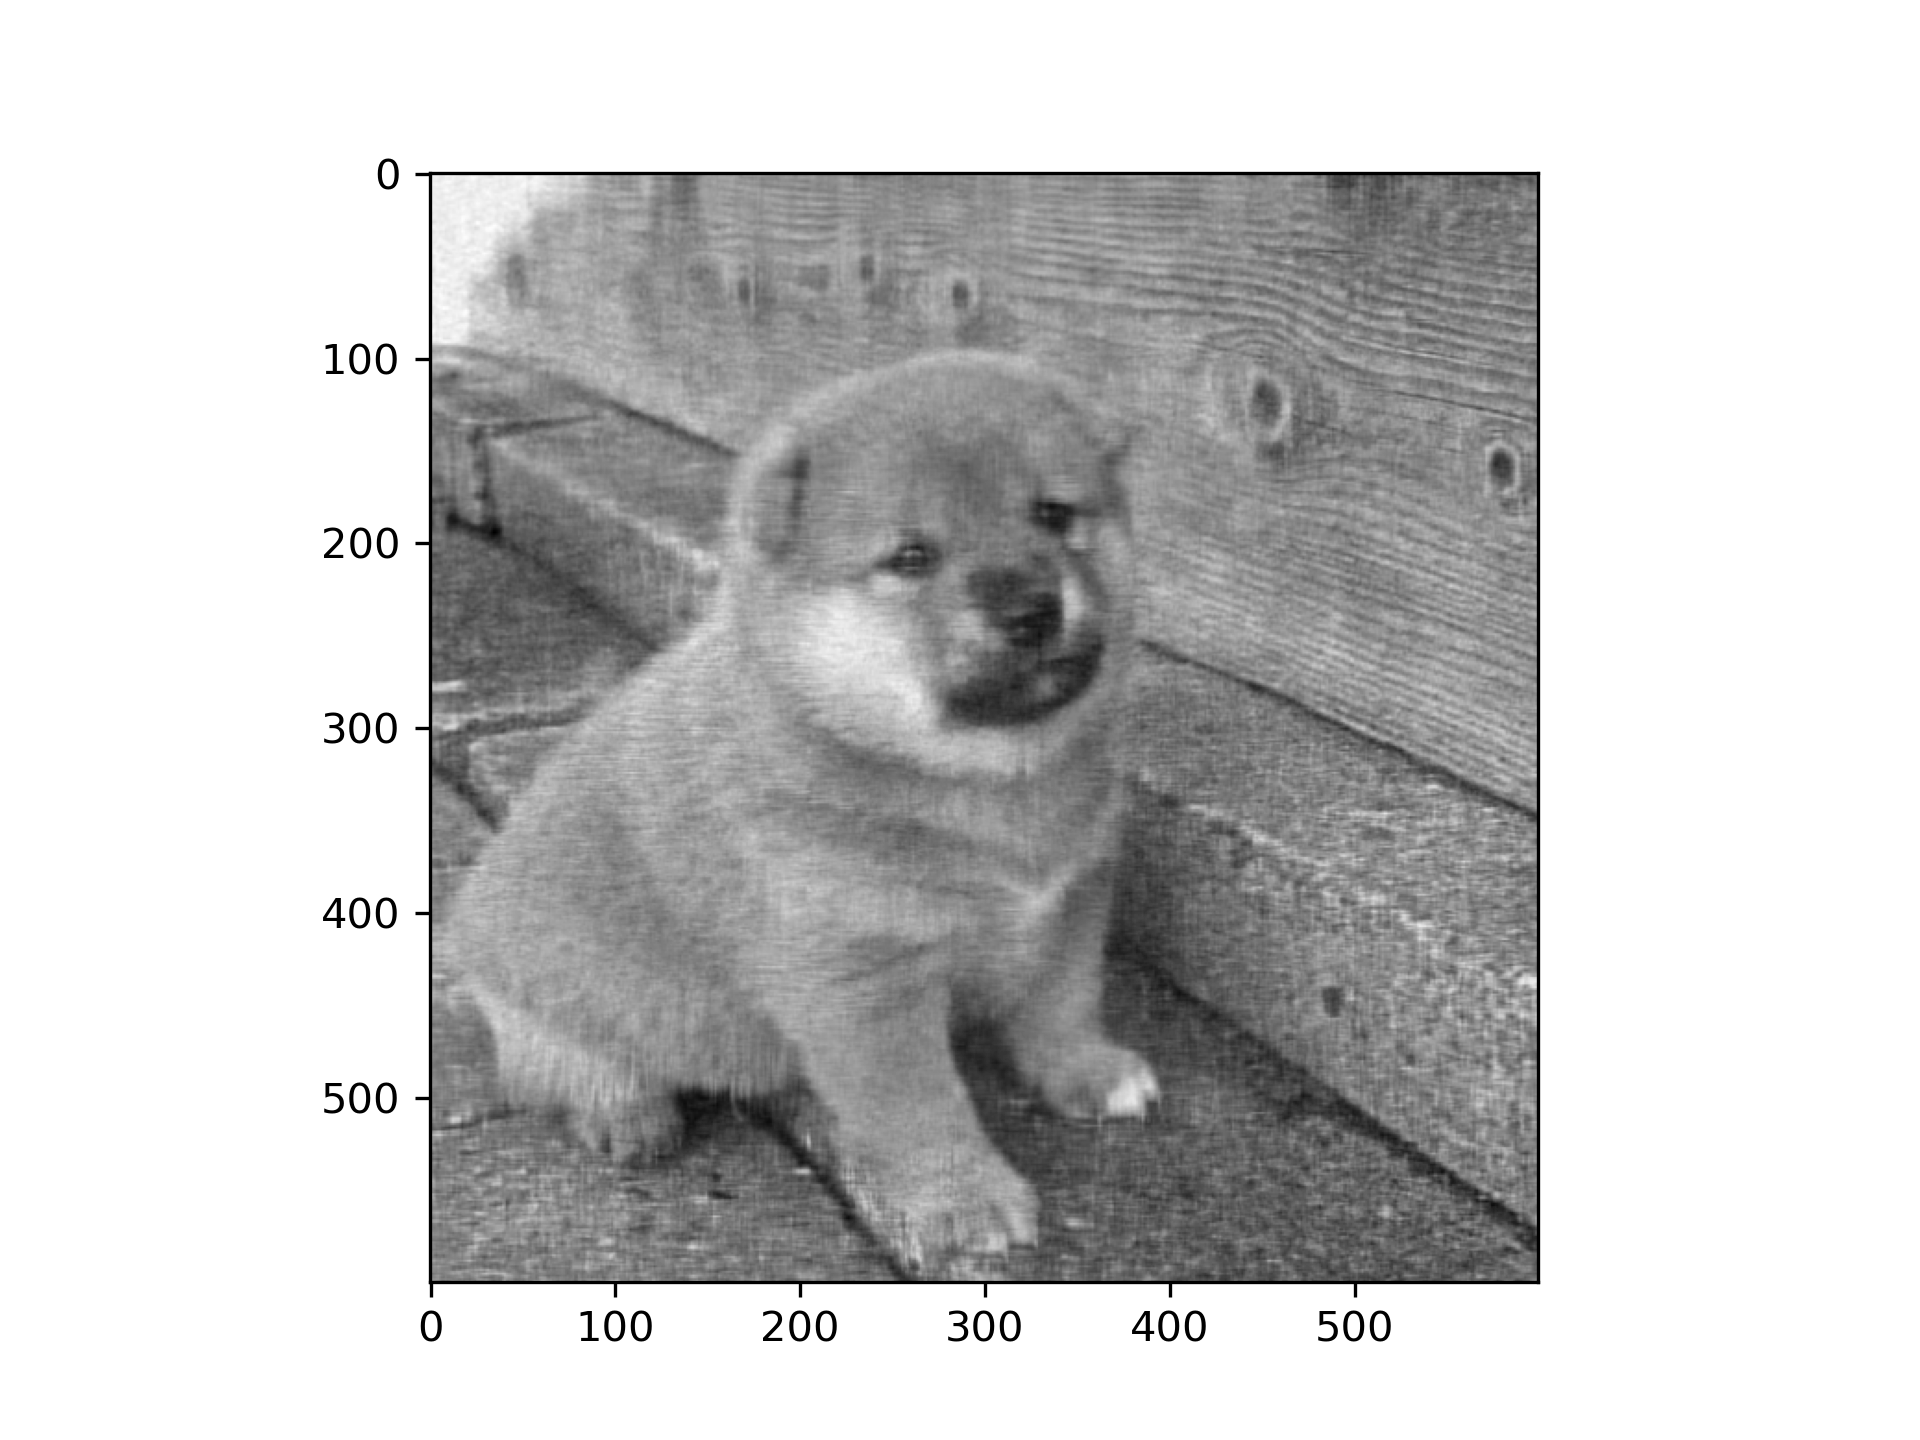

interactive(children=(FloatSlider(value=0.1, description='t', max=1.0, min=0.1), Output()), _dom_classes=('wid…

In [30]:
def SVDthresh(S,T):
    sigsum = np.sum(S)
    Ss = S/sigsum
    cumulative = np.cumsum(Ss)
    return(np.argmax(cumulative>T))
def Compression(A, t):
    U,S,V = np.linalg.svd(A)
    Sig = np.diag(S)
    V = V.T
    k = SVDthresh(S,t)
    return SVDRebuild(U,Sig,V,k)
fig, ax = plt.subplots()

@interact(t=widgets.FloatSlider(min=0.1,max=1,step=0.1, value = 0.1,continuous_update=True))
def update(t):
    ax.imshow(Compression(A,t),cmap='gray')
